## 2. Exploratory data analysis

1. Exploration of variables individually
2. Assessment of the relationship between each variable and the target variable
3. Assessment of the interaction between variables
4. Exploration of data across many dimensions

_Note: The first part of this section has been already been performed in notebook "1A_JNT_collection_and_inspection"_

Importing the required packages and dataset:

In [40]:
# Import the required packages

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import pre-processed dataset and load it into a dataframe

# Create path variable
file = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/processed/clean.csv'

# Create dictionary with categorial variables to specify when loading csv in dataframe
cat_dict = {'COOLTYPE':'category',
            'EQUIPAGE':'category',
            'EQUIPM':'category',
            'FUELHEAT':'category',
            'IECC_CLIMATE_PUB':'category',
            'KOWNRENT':'category',
            'MONEYPY':'category',
            'ROOFTYPE':'category',
            'TYPEHUQ':'category',
            'STORIES':'category',
            'WALLTYPE':'category',
            'YEARMADERANGE':'category',
              }

# Load csv in dataframe
df = pd.read_csv(file, index_col=0, dtype=cat_dict)

In [3]:
df.shape

(5686, 42)

In [4]:
# Print sample

df.head()

,ATTIC,ATTICFIN,BASEFIN,BEDROOMS,CDD30YR,CDD65,CELLAR,COOLTYPE,DOLELCOL,DOLLAREL,...,WALLTYPE,YEARMADERANGE,DOLELLGT,TOTALDOLWTH,TOTALDOLWTH_log,DOLELLGT_log,TOTSQFT_EN_log,TOTALDOLSPH_log,DOLLAREL_log,DOLELCOL_log
0,0.0,0.0,0.0,3,1332.0,1768.0,0.0,Central AC,365.46,967.23,...,Stucco,2000-2009,75.18,248.33,5.514759,4.319885,7.499977,5.173831,6.874436,5.901157
1,0.0,0.0,0.0,2,2494.0,2795.0,0.0,Individual units,249.54,1366.00,...,Siding,1980-1989,124.51,234.49,5.457413,4.824386,6.632002,5.941539,7.219642,5.519619
2,0.0,0.0,1.0,4,2059.0,2235.0,1.0,Both central and individual,844.63,2428.08,...,Wood,1970-1979,113.33,250.71,5.524297,4.730304,7.735433,6.398878,7.794856,6.738899
3,0.0,0.0,1.0,3,1327.0,1374.0,1.0,Central AC,471.13,1313.12,...,Siding,1950-1959,64.58,114.62,4.741622,4.167905,7.852828,6.760948,7.180161,6.155134
4,1.0,0.0,0.0,3,871.0,993.0,1.0,Central AC,62.05,581.07,...,Brick,1970-1979,112.65,220.26,5.394809,4.724286,6.931472,4.217594,6.364871,4.127941


---

**Assessment of the relationship between each variable and the target variable**

- Heating and cooling cost by unit type is plotted below:

In [6]:
# Set visual style for plots

plt.style.use('seaborn')

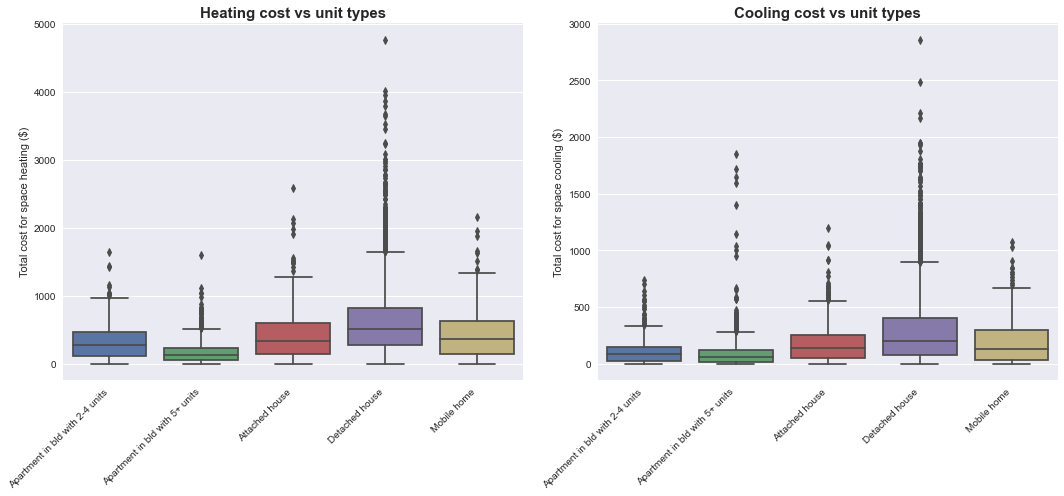

In [17]:
# Creates the figure
fig = plt.figure(figsize=(15,7), dpi=72)

plt.subplot(1,2,1)
sns.boxplot(x='TYPEHUQ', y='TOTALDOLSPH', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Heating cost vs unit types', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')


plt.subplot(1,2,2)
sns.boxplot(x='TYPEHUQ', y='DOLELCOL', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Cooling cost vs unit types', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

- Heating and cooling cost by climate zone is plotted below. 

    Also, a map showing International Energy Conservation Code (IECC) climate regions" is displayed as well for reference.

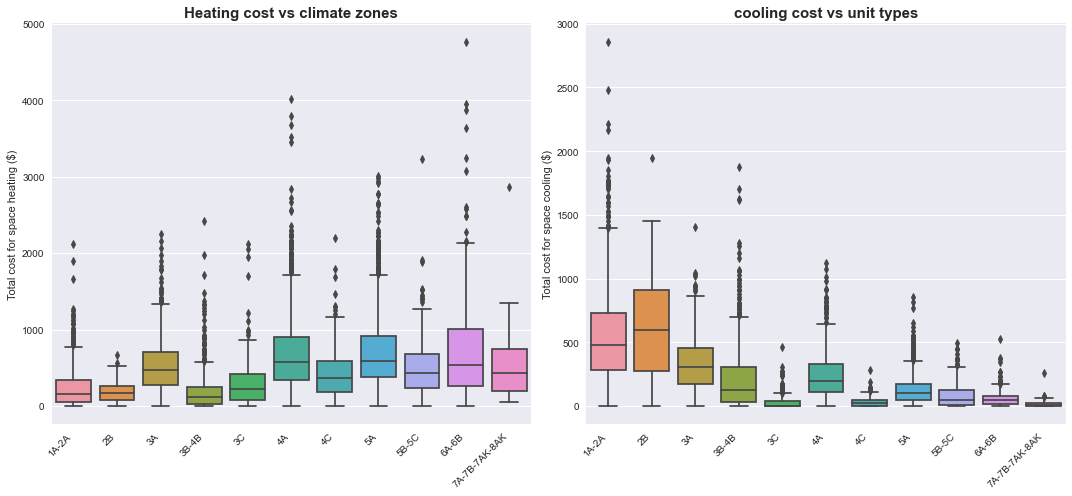

In [22]:
# Creates the figure
fig = plt.figure(figsize=(15,7), dpi=72)

plt.subplot(1,2,1)
sns.boxplot(x='IECC_CLIMATE_PUB', y='TOTALDOLSPH', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Heating cost vs climate zones', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space heating ($)')
plt.xlabel('')


plt.subplot(1,2,2)
sns.boxplot(x='IECC_CLIMATE_PUB', y='DOLELCOL', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('cooling cost vs unit types', weight='bold').set_fontsize('15')
plt.ylabel('Total cost for space cooling ($)')
plt.xlabel('')

plt.tight_layout()
plt.show()

![International Energy Conservation Code (IECC) climate regions](img/climate_regions.png "International Energy Conservation Code (IECC) climate regions")

In the next cells, interaction between target variables and continuous variables are investigated. Some fuctions are created to easily display plots to show the outcome:

In [59]:
# Create functions to create fit line for regression analysis

def fit_line_lin(var1, var2):
    '''Creates plot object of linear fit line between two variables'''
    fit_line = np.polyfit(var1, var2, 1)
    return plt.plot(var1, fit_line[0] * var1 + fit_line[1], color='red', linewidth=1)

def fit_line_quad(var1, var2):
    '''Creates plot object of quadratic fit line between two variables'''
    fit_line = np.polyfit(var1, var2, 2)
    return plt.plot(var1, fit_line[0] * var1**2 + fit_line[1] * var1 + fit_line[2], color='green', linewidth=1)

def fit_line_cub(var1, var2):
    '''Creates plot object of cubic fit line between two variables'''
    fit_line = np.polyfit(var1, var2, 3)
    return plt.plot(var1, fit_line[0] * var1**3 + fit_line[1] * var1**2 + fit_line[2] * var1 + fit_line[3], color='blue', linewidth=1)

- **Energy consumption cost** by **floor area** is depicted in the cell below. 

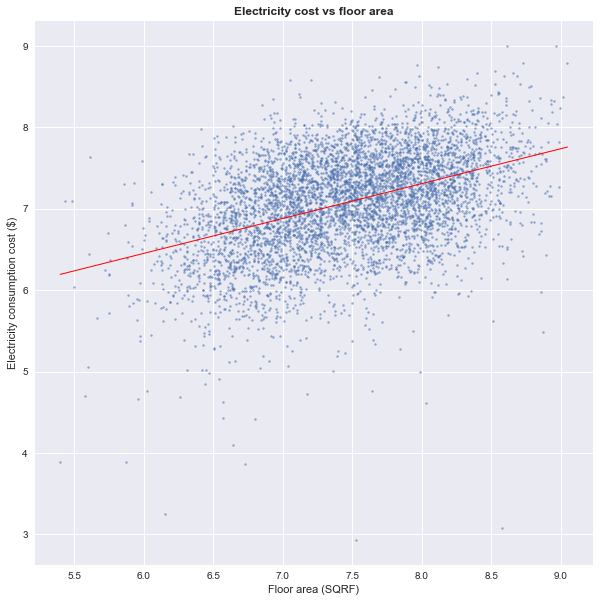

In [84]:
# Sort values by floor area
df_bySQF = df.sort_values(by='TOTSQFT_EN_log')

# Create the figure
fig = plt.figure(figsize=(10,10), dpi=72)

# Plot electricity consumption vs floor area
plt.scatter(x=df_bySQF['TOTSQFT_EN_log'], y=df_bySQF['DOLLAREL_log'], alpha=0.6, s=15, marker='.')
plt.xlabel('Floor area (SQRF)')
plt.ylabel('Electricity consumption cost ($)')
plt.title('Electricity cost vs floor area', weight='bold').set_fontsize('12')

# Plot regression line
fit_line_lin(df_bySQF['TOTSQFT_EN_log'], df_bySQF['DOLLAREL_log'])

plt.show()

<Figure size 1080x1080 with 0 Axes>

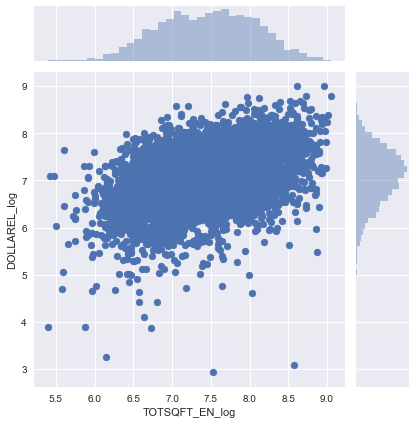

In [82]:
# Plot joint plot for floor area and electricity consumption

fig = plt.figure(figsize=(15,15), dpi=72)
sns.jointplot(x='TOTSQFT_EN_log', y='DOLLAREL_log', data=df)
plt.show()

<Figure size 1080x1080 with 0 Axes>

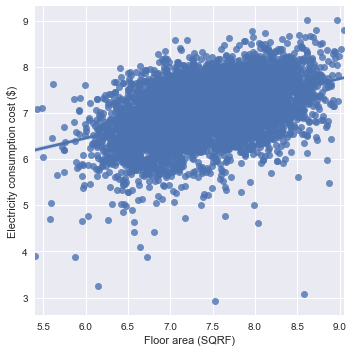

In [64]:
# Plot linear regression

fig = plt.figure(figsize=(15,15), dpi=72)
sns.lmplot(x='TOTSQFT_EN_log', y='DOLLAREL_log', data=df)
plt.xlabel('Floor area (SQRF)')
plt.ylabel('Electricity consumption cost ($)')
plt.show()

- **Heating cost** and **cooling cost** by **floor area** is shown in the next two graphs:

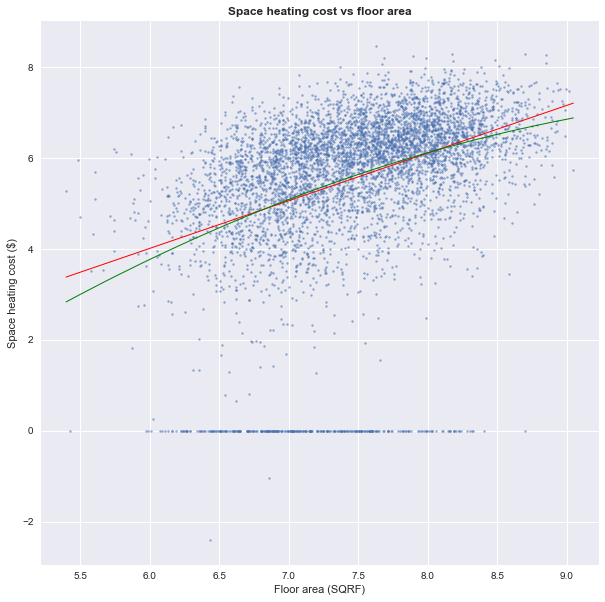

In [86]:
# Create the figure
fig = plt.figure(figsize=(10,10), dpi=72)

# Plot heating cost vs floor area
plt.scatter(x=df_bySQF['TOTSQFT_EN_log'], y=df_bySQF['TOTALDOLSPH_log'], alpha=0.6, s=15, marker='.')
plt.xlabel('Floor area (SQRF)')
plt.ylabel('Space heating cost ($)')
plt.title('Space heating cost vs floor area', weight='bold').set_fontsize('12')

# Plot regression line
fit_line_lin(df_bySQF['TOTSQFT_EN_log'], df_bySQF['TOTALDOLSPH_log'])
fit_line_quad(df_bySQF['TOTSQFT_EN_log'], df_bySQF['TOTALDOLSPH_log'])

plt.show()

---

- Two variables containing cooling degree days (CDD) in 2015 and a 30 years CDD average are collated to analyze how far 2015 deviates from the average, and later adjust the response variable result accordingly. Cumulative distribution functions for both variables are plotted for comparison below:

In [26]:
# Create a function to plot CDFs

def Cdf(series):
    '''Creates a plot object of a CDF for a pandas series'''
    cdf = 1. * np.arange(len(series)) / (len(series) - 1)
    return plt.plot(series.sort_values(), cdf)

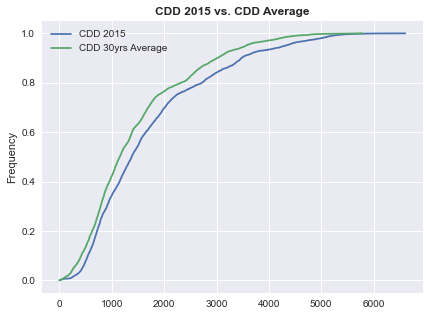

In [32]:
# Creates the figure
fig = plt.figure(figsize=(15,5), dpi=72)

# Plots function for cooling degree days
plt.subplot(1,2,1)
Cdf(df['CDD65'])
Cdf(df['CDD30YR'])

# Adjusts appearance
plt.ylabel('Frequency')
plt.title('CDD 2015 vs. CDD Average', fontsize='large', fontweight='bold')
plt.legend(['CDD 2015', 'CDD 30yrs Average'])

plt.show()

- Same process for Heating Degree Days (HDD)

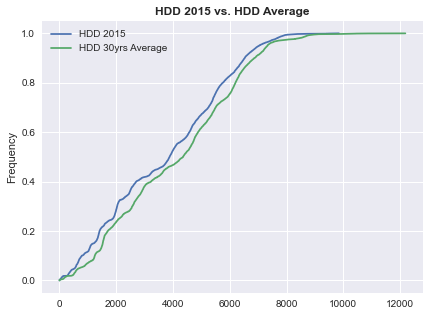

In [34]:
# Creates the figure
fig = plt.figure(figsize=(15,5), dpi=72)

# Plots function for heating degree days
plt.subplot(1,2,1)
Cdf(df['HDD65'])
Cdf(df['HDD30YR'])

# Adjusts appearance of graph B
plt.ylabel('Frequency')
plt.title('HDD 2015 vs. HDD Average', fontsize='large', fontweight='bold')
plt.legend(['HDD 2015', 'HDD 30yrs Average'])

plt.show()

Data shows that year 2015 has been cooler that the 30 years average. In the following cell, percentage differences in cooling and heating degree days of 2015 vs 30 years mean have been computed.  

In [39]:
# Calculates cooling degree days mean difference in % 
prct_diff_CDD = round(((df['CDD30YR'].mean()-df['CDD65'].mean())*100 / df['CDD30YR'].mean()), 2)

# Calculates heating degree days mean difference in % 
prct_diff_HDD = round(((df['HDD30YR'].mean()-df['HDD65'].mean())*100 / df['HDD30YR'].mean()), 2)

print('On average, year 2015 had '+str(-prct_diff_CDD)+'% less cooling degree days and '+str(prct_diff_HDD)+'% more heating degree days than a typical year.')

On average, year 2015 had 18.51% less cooling degree days and 9.27% more heating degree days than a typical year.


---

In [ ]:
df_opt = df.drop(['TOTALDOLWTH', 'DOLELLGT', 'TOTSQFT_EN', 'TOTALDOLSPH', 'DOLLAREL', 'DOLELCOL'], axis=1)

sns.pairplot(df_opt)
plt.show()